# **Projet final Datascience**

#### **Import des différentes bibliothèques**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64 (2).dll
C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"

Bad key figure.labelsize in file C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\mpl-data\stylelib\classic (2).mplstyle, line 310 ('figure.labelsize:   medium    # size of the figure l

#### **Présentation du jeu de données et des différentes valeurs**

**Lecture du fichier CSV**

In [2]:
df = pd.read_csv('car_data.csv')

**Analyse de surface du dataset :** 
- Shape
- Colonnes

In [3]:
print("Voici la shape du dataframe : " +  str(df.shape))
print("Les différentes colonnes du dataset sont : " +",".join(df.columns))

Voici la shape du dataframe : (301, 9)
Les différentes colonnes du dataset sont : Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner


**Visualisation des 5 premières lignes du dataset**

In [4]:
print(df.head(5))

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


**Suppression de colonnes :**
- "Car_Name" est une donnée inutile pour prédire le prix d'une fonction en fonction des différentes features

In [5]:
df = df.drop('Car_Name',axis=1)
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


**Présentation des colonnes avec des valeurs numériques**

In [6]:
df[['Selling_Price','Present_Price','Kms_Driven']].describe()

,Selling_Price,Present_Price,Kms_Driven
count,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980
std,5.082812,8.644115,38886.883882
min,0.100000,0.320000,500.000000
25%,0.900000,1.200000,15000.000000
50%,3.600000,6.400000,32000.000000
75%,6.000000,9.900000,48767.000000
max,35.000000,92.600000,500000.000000


In [7]:
print(df['Fuel_Type'].value_counts())
print("\n")
print(df['Seller_Type'].value_counts())
print("\n")
print(df['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


**Changements dans le dataset :** 
- Ajout de la colonne age pour la simplicité de compréhension de la vieillesse d'une voiture
- Suppression de la colonne Year qui ne sert plus à rien

In [8]:
maxAge = df['Year'].max()
df['carAge'] = (maxAge+ 1) - df['Year']

**Suppression des données qui ne sont pas exploitable**
- Nous allons supprimer les deux lignes qui correspondent à CNG dans Fuel_Type

In [9]:
lineToDrop = df[df['Fuel_Type'] == 'CNG'].index
df = df.drop(lineToDrop)

In [10]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,carAge
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


**Visualisation des données**
- Visualisation des différentes Features en fonction du prix de vente

C:\Users\valen\AppData\Local\Temp\ipykernel_2912\2284150564.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


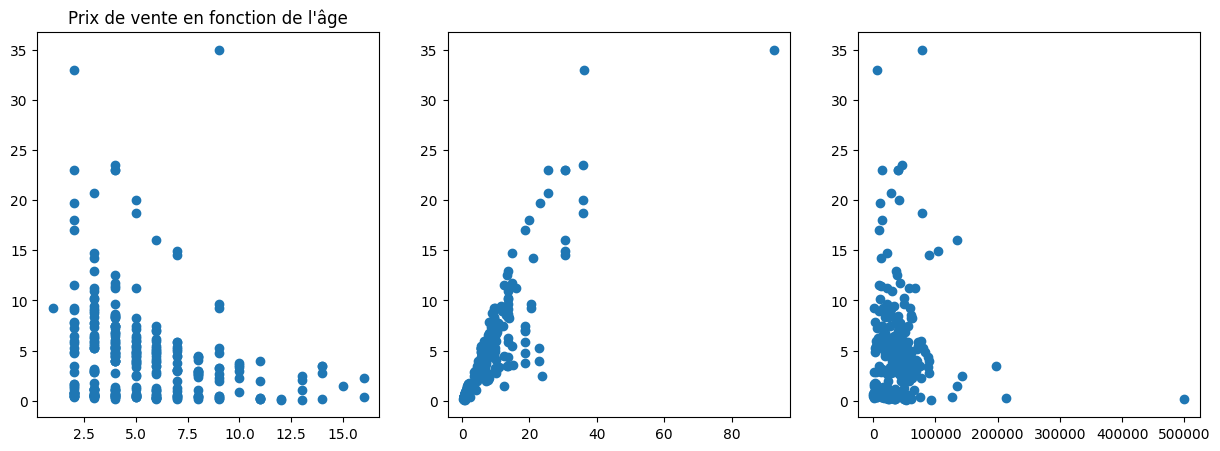

In [11]:
fig,axes = plt.subplots(nrows=1,ncols=3, figsize=(15,5))
axes[0].scatter(df['carAge'],df['Selling_Price'])
axes[0].set_title('Prix de vente en fonction de l\'âge')


axes[1].scatter(df['Present_Price'],df['Selling_Price'])
axes[2].scatter(df['Kms_Driven'],df['Selling_Price'])
fig.show()

**Analyse des boxplot pour enlever les outliers**

C:\Users\valen\AppData\Local\Temp\ipykernel_2912\234977712.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


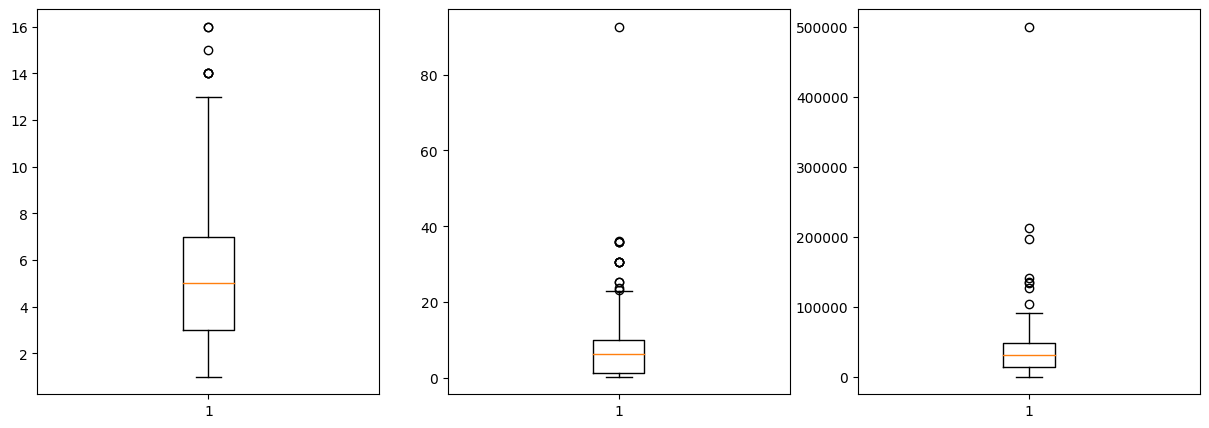

In [12]:
fig,axes = plt.subplots(nrows=1,ncols=3, figsize=(15,5))
axes[0].boxplot(df['carAge'])
axes[1].boxplot(df['Present_Price'])
axes[2].boxplot(df['Kms_Driven'])
fig.show()